In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas
from scipy.special import factorial
randvar_count = 10000
sample_count = 1
teta = 1

%matplotlib inline


Условие - https://drive.google.com/drive/u/0/folders/1RpRVVsTgqBHZLevRy897SCCpDmeo3BWZ


Я разбиваю отрезок [-10, 10] по 0.01 на bins и генерирую выборку.
Для каждого n я создаю гистограмму и пытаюсь апроксимировать истинный cdf, нормированный от -1 до 1.
Соответственно в зависимости от того, сколько точек из распределения попали в ту или иную
корзину я строю гистограмму. Потом вывожу два графика.



c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


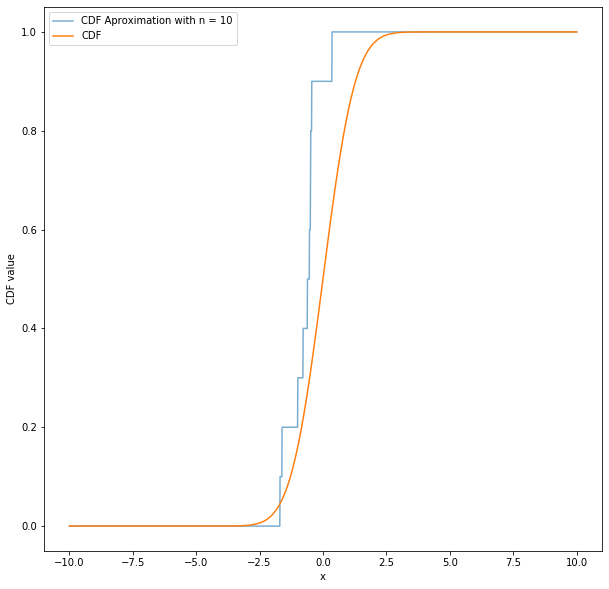

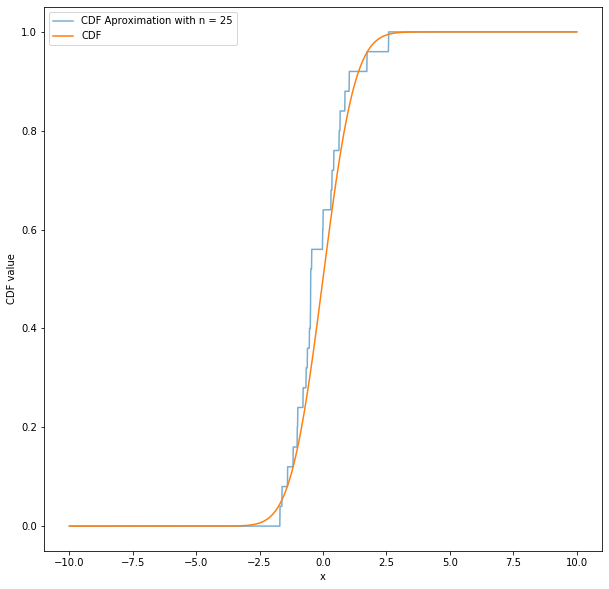

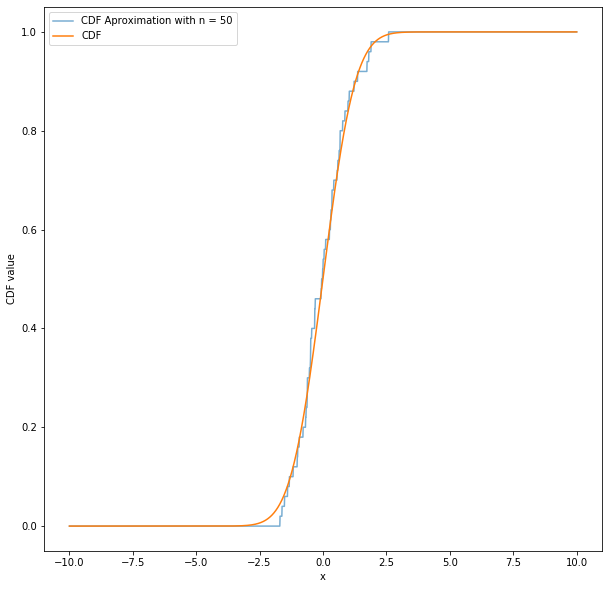

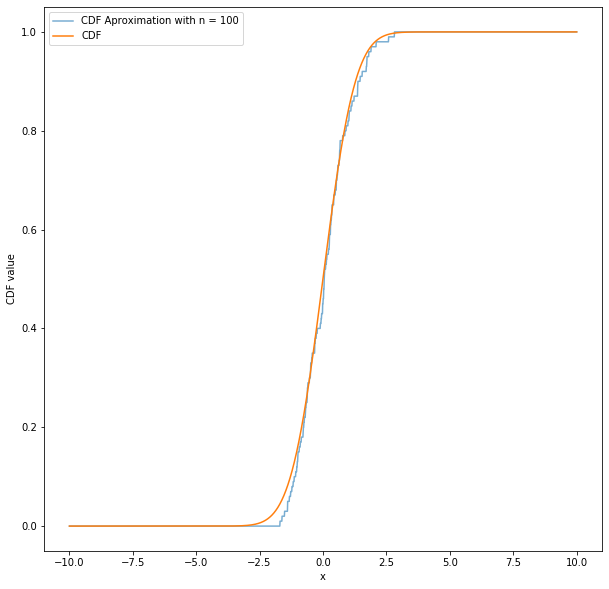

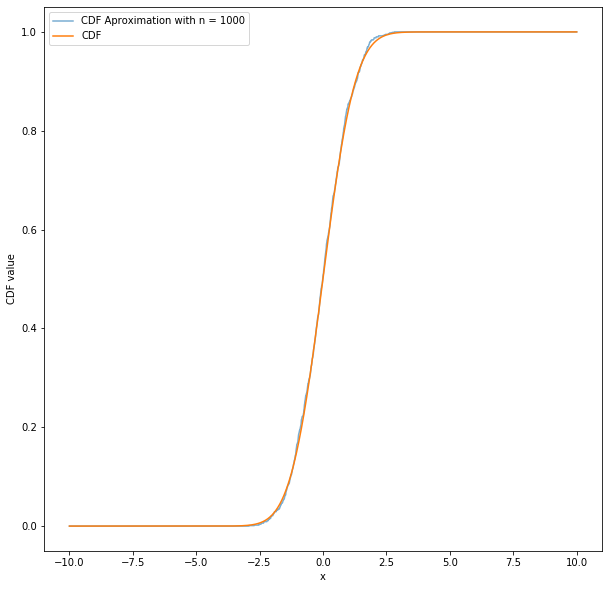

In [5]:
bins = [age for age in np.arange(-10, 10.001, 0.01)] # bins for cdf approximation
array = sps.norm.rvs(size=(sample_count, randvar_count))

def get_sample_x_and_cdf(n):
        sample = array[:, :n]
        counts, bin_edges = np.histogram(sample, bins=bins, normed=True)
        cdf = np.cumsum(counts)
        
        return (bin_edges[1:], cdf / max(cdf)) # normed

def show_cdf_approximation():
    for n in [10, 25, 50, 100, 1000]:
        plt.figure(figsize=(10, 10))

        x, cdf = get_sample_x_and_cdf(n)
        plt.plot(x, cdf, alpha=0.6, label='CDF Aproximation with n = {0}'.format(n))    
        plt.plot(x, sps.norm.cdf(x), label='CDF')
        plt.xlabel('x')
        plt.ylabel('CDF value')
        
        plt.legend()
        plt.show()
    
show_cdf_approximation()


Тут я считаю оценки Dn и $\sqrt{n}*Dn$. В качестве sup я беру max из всех разностей
cdf и апроксиматического cdf  (тут оно записано как F - cdf и Fn - cdf(n)).
Чтобы построить $\sqrt{n}*Dn$ я просто умножаю полученные результаты Dn на $\sqrt{n}$.


c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


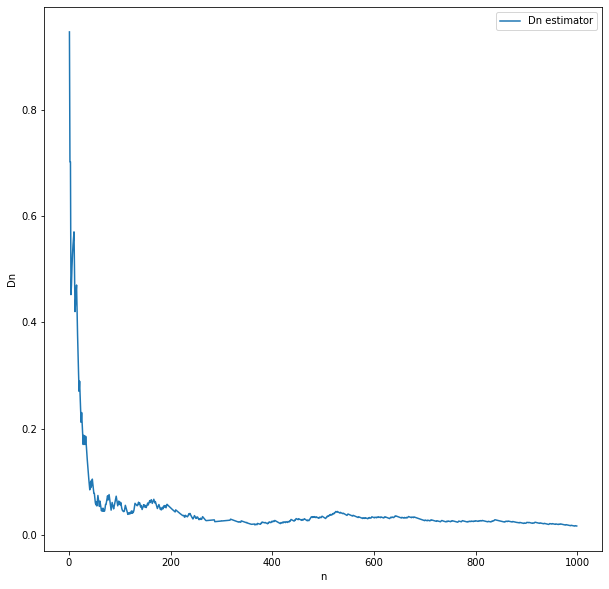

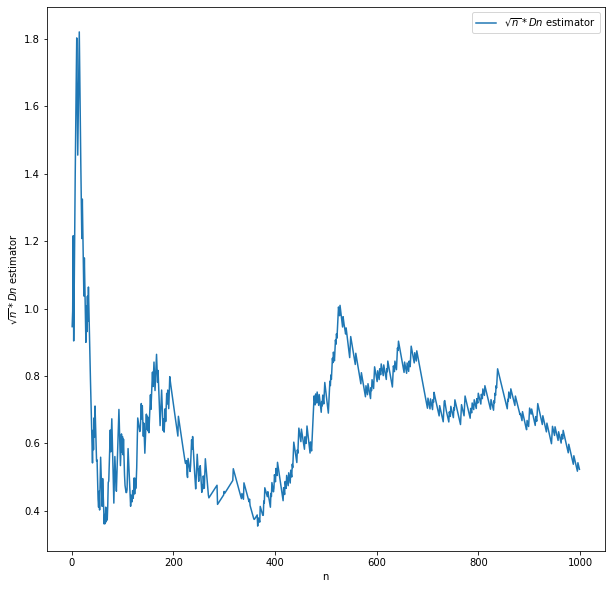

In [6]:
def show_Dn():
    def get_F_and_Fn(n):
        x, cdf = get_sample_x_and_cdf(n)
        return zip(sps.norm.cdf(x), cdf)
    
    x = [n for n in range(1, randvar_count)]
    
    
    y = np.array([max([abs(Fn - F) for (F, Fn) in get_F_and_Fn(n)]) 
                  for n in range(1, randvar_count)])    
    
    plt.figure(figsize=(10, 10))
    plt.plot(x, y, label='Dn estimator')
    plt.xlabel('n')
    plt.ylabel('Dn')
    
    plt.legend()
    plt.show()
    
    y = np.array([np.sqrt(n)*Dn for (n, Dn) in zip(range(1, randvar_count), y)]) 
    plt.figure(figsize=(10, 10))
    plt.plot(x, y, label='$\sqrt{n}*Dn$ estimator')
    plt.xlabel('n')
    plt.ylabel('$\sqrt{n}*Dn$ estimator')
    
    plt.legend()
    plt.show()
    
show_Dn()
